# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/AN2DL/ShareFolder/Preprocessing

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/AN2DL/ShareFolder/Preprocessing


## ⚙️ Import Libraries

In [ ]:
# Set seed for reproducibility
seed = 85

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from PIL import Image
import matplotlib.gridspec as gridspec
import hashlib
from collections import defaultdict
from tqdm import tqdm
from sklearn.ensemble import IsolationForest

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.1


## ⏳ Load the Data

In [ ]:
# Load data
data = np.load('training_set.npz')
X = data['images']
y = data['labels']

Class 0: 1052 samples
Class 1: 2381 samples
Class 2: 1285 samples
Class 3: 2226 samples
Class 4: 1049 samples
Class 5: 1393 samples
Class 6: 2530 samples
Class 7: 1843 samples


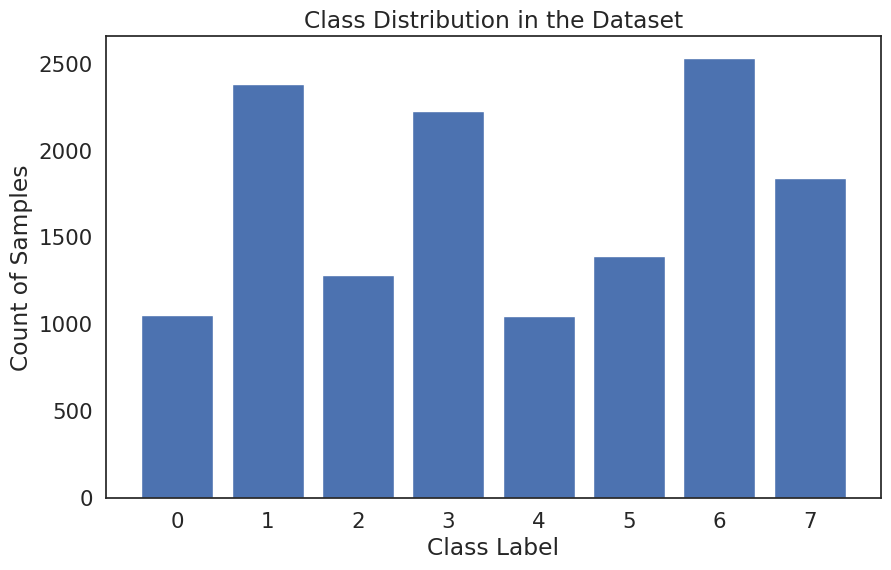

In [ ]:
# Display the counts for each class
unique_labels, counts = np.unique(y, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Class {label}: {count} samples")

# Create a bar chart to visualize the class distribution
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts)
plt.xlabel('Class Label')
plt.ylabel('Count of Samples')
plt.title('Class Distribution in the Dataset')
plt.xticks(unique_labels)  # Ensure all class labels are shown
plt.show()

In [ ]:
# Function to compute hash for an image
def compute_image_hash(image):
    img_bytes = image.tobytes()  # Convert image to bytes
    return hashlib.md5(img_bytes).hexdigest()  # Compute MD5 hash

# Dictionary to store hashes and their indices
hash_dict = defaultdict(list)

# Compute hash for each image and store indices
for idx, img in enumerate(tqdm(X)):
    img_hash = compute_image_hash(img)
    hash_dict[img_hash].append(idx)

# Identify duplicate hashes
duplicates = {img_hash: indices for img_hash, indices in hash_dict.items() if len(indices) > 1}

# To store all indices to remove
indices_to_remove = []

# Identify the last two duplicate hashes
last_two_hashes = list(duplicates.keys())[-2:]  # Get the last two hashes in the dictionary

# Process duplicates
for img_hash, indices in duplicates.items():
    if img_hash in last_two_hashes:
        # If it's one of the last two hashes, remove all associated indices
        indices_to_remove.extend(indices)
    else:
        # Otherwise, keep the first image, remove the rest
        indices_to_remove.extend(indices[1:])

# Create a new dataset with only unique images (no duplicates)
indices_to_keep = [idx for idx in range(len(X)) if idx not in indices_to_remove]
X_filtered = X[indices_to_keep]
y_filtered = y[indices_to_keep]

# Extract images that had duplicates and were removed
removed_images = X[indices_to_remove]

# Print results
print(f"Original dataset size: {len(X)} images")
print(f"New dataset size after removing all duplicates: {len(X_filtered)} images")
print(f"Number of images removed (duplicates): {len(removed_images)}\n")

100%|██████████| 13759/13759 [00:00<00:00, 19166.13it/s]


Original dataset size: 13759 images
New dataset size after removing all duplicates: 11951 images
Number of images removed (duplicates): 1808



Duplicate images for hash d5dd027c53115329e3ae38255636b002: [120, 4761]


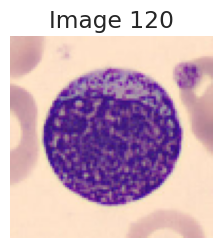

Duplicate images for hash 7d886eea58027fdf845dae148f2c58ee: [810, 11026]


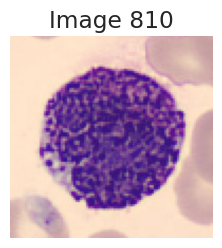

Duplicate images for hash 925d5dc55eecab7e2f3c9d83a281634f: [1074, 3440]


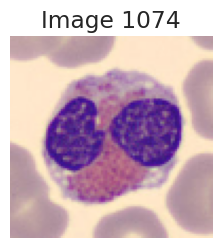

Duplicate images for hash 96db0569d5cbdab3bbd527551002138a: [3052, 11566]


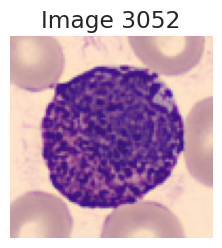

Duplicate images for hash f39a51aa0f212ab7288df2aba5fc8a6e: [3328, 11575]


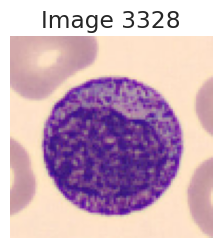

Duplicate images for hash 1e26f78cdf123cb948fdca2aacd18049: [5466, 11856]


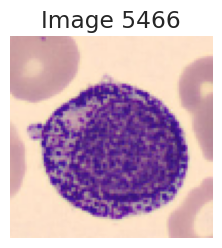

Duplicate images for hash d94ef7d729ff6e7ec3c6349c14d602df: [7953, 10734]


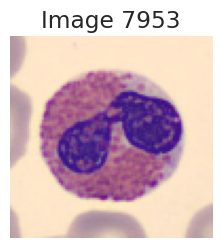

Duplicate images for hash 06c86bed6d52d0fd55f12db4a4ad7d1c: [8117, 9084]


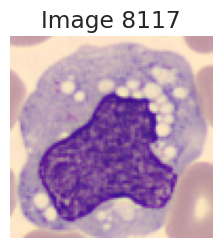

Duplicate images for hash 6cf0f392e57a6c16165d9b84c885ff78: [11959, 11960, 11961, 11962, 11963, 11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983, 11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993, 11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003, 12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013, 12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023, 12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033, 12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12042, 12043, 12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053, 12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063, 12064, 12065, 12066, 12067, 12068, 12069, 12070, 12071, 12072, 12073, 12074, 12075, 12076, 12077, 12078, 12079, 12080, 12081, 12082, 12083, 12084, 12085, 12086, 12087, 12088, 12089, 12090, 12091, 12092, 1

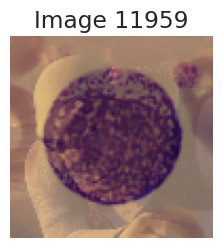

Duplicate images for hash e2a4597c107ff8683737443da52bfb58: [13559, 13560, 13561, 13562, 13563, 13564, 13565, 13566, 13567, 13568, 13569, 13570, 13571, 13572, 13573, 13574, 13575, 13576, 13577, 13578, 13579, 13580, 13581, 13582, 13583, 13584, 13585, 13586, 13587, 13588, 13589, 13590, 13591, 13592, 13593, 13594, 13595, 13596, 13597, 13598, 13599, 13600, 13601, 13602, 13603, 13604, 13605, 13606, 13607, 13608, 13609, 13610, 13611, 13612, 13613, 13614, 13615, 13616, 13617, 13618, 13619, 13620, 13621, 13622, 13623, 13624, 13625, 13626, 13627, 13628, 13629, 13630, 13631, 13632, 13633, 13634, 13635, 13636, 13637, 13638, 13639, 13640, 13641, 13642, 13643, 13644, 13645, 13646, 13647, 13648, 13649, 13650, 13651, 13652, 13653, 13654, 13655, 13656, 13657, 13658, 13659, 13660, 13661, 13662, 13663, 13664, 13665, 13666, 13667, 13668, 13669, 13670, 13671, 13672, 13673, 13674, 13675, 13676, 13677, 13678, 13679, 13680, 13681, 13682, 13683, 13684, 13685, 13686, 13687, 13688, 13689, 13690, 13691, 13692, 1

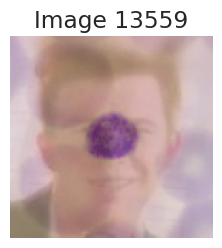

In [ ]:
# Visualize duplicates
for img_hash, indices in duplicates.items():
    print(f"Duplicate images for hash {img_hash}: {indices}")
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices[:1]):  # Show only one duplicate from each hash
        plt.subplot(1, 4, i + 1)
        plt.imshow(X[idx])
        plt.title(f'Image {idx}')
        plt.axis('off')
    plt.show()

In [ ]:
# Flatten the images for isolation forest
X_flat = X_filtered.reshape(len(X_filtered), -1)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_flat)

# -1 indicates an outlier, 1 indicates normal
outlier_indices = np.where(outliers == -1)[0]

# Remove Outliers
X_cleaned = np.delete(X_filtered, outlier_indices, axis=0)
y_cleaned = np.delete(y_filtered, outlier_indices, axis=0)

removed_outliers = X_filtered[outlier_indices]
print("Number of removed images: ", len(removed_outliers))

Number of removed images:  598


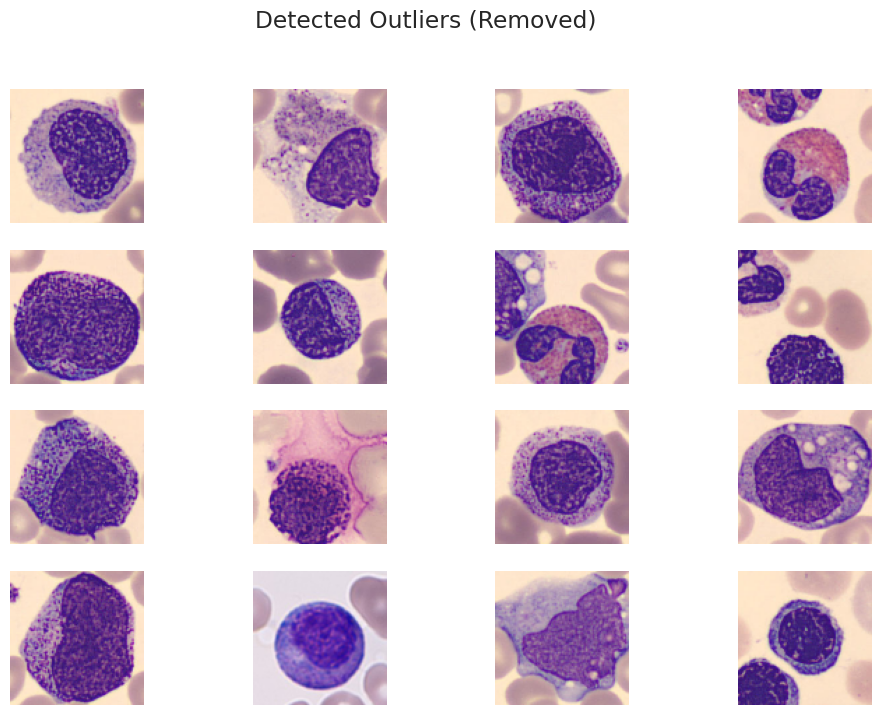

In [ ]:
# Visualize Removed Outliers
plt.figure(figsize=(12, 8))
for i in range(min(len(removed_outliers), 16)):  # Show up to 16 outliers
    plt.subplot(4, 4, i + 1)
    plt.imshow(removed_outliers[i])
    plt.axis('off')
plt.suptitle('Detected Outliers (Removed)')
plt.show()

Class 0: 817 samples
Class 1: 2098 samples
Class 2: 1050 samples
Class 3: 1735 samples
Class 4: 835 samples
Class 5: 914 samples
Class 6: 2280 samples
Class 7: 1624 samples


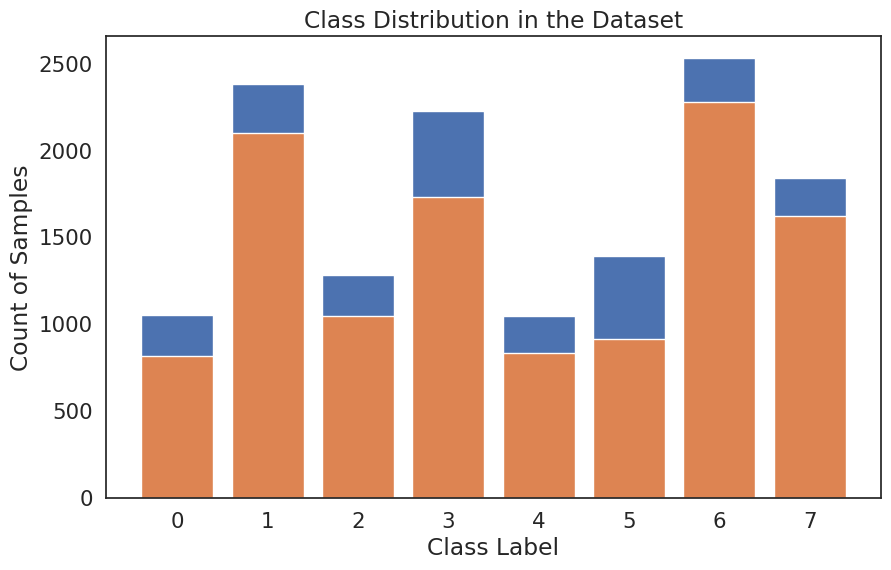

In [ ]:
# Display the counts for each class
unique_labels_new, counts_new = np.unique(y_cleaned, return_counts=True)
for label, count in zip(unique_labels_new, counts_new):
    print(f"Class {label}: {count} samples")

# Create a bar chart to visualize the class distribution
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts)
plt.bar(unique_labels_new, counts_new)
plt.xlabel('Class Label')
plt.ylabel('Count of Samples')
plt.title('Class Distribution in the Dataset')
plt.xticks(unique_labels_new)  # Ensure all class labels are shown
plt.show()

In [ ]:
np.savez('training_set_cleaned.npz', images=X_cleaned, labels=y_cleaned)